# Analyse du jeu de données concernant l'étude sur les primes d'assurance

## Importation des librairies et du jeu de données

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.read_csv("csv/dataset_cleaned.csv")

Rappel concernant le jeu de données :

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Analyses univariées

### Variable "age"

In [25]:
data["age"].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Pour visualiser la variable "age" dans un graphique, il faut agréger les valeurs en classes de plusieurs tranches d'âges.

In [10]:
age_range = [
    {"category": "18-24", "range": [18, 24]},
    {"category": "25-34", "range": [25, 34]},
    {"category": "35-44", "range": [35, 44]},
    {"category": "45-54", "range": [45, 54]},
    {"category": "55-64", "range": [55, 64]},
]

age_count = []
for age in data["age"]:
    for range in age_range:
        if age >= range["range"][0] and age <= range["range"][1]:
            age_count.append(range["category"])
            continue

data["age_range"] = age_count

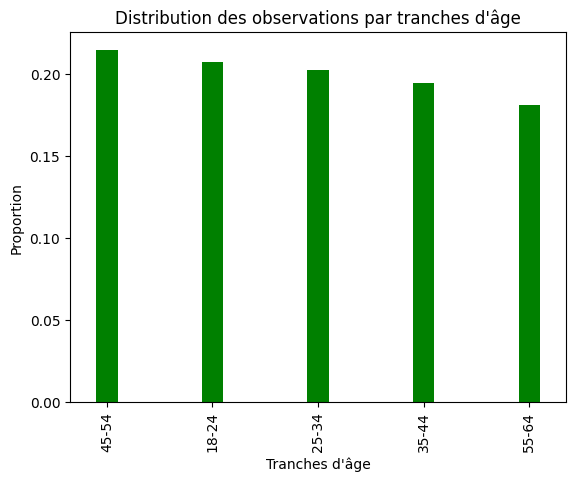

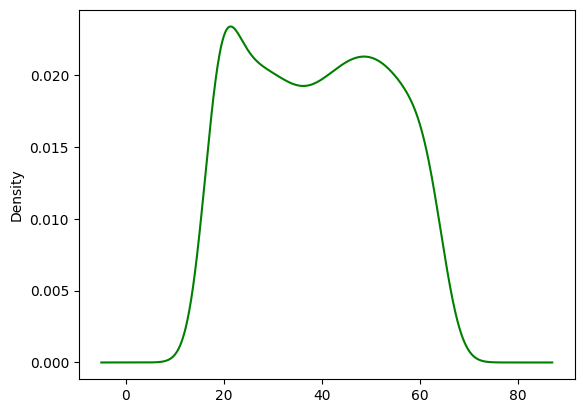

In [19]:
data["age_range"].value_counts(normalize=True).plot(kind="bar", color="green", width=0.2)
plt.title("Distribution des observations par tranches d'âge")
plt.xlabel("Tranches d'âge")
plt.ylabel("Proportion")
plt.show()

data["age"].plot.kde(color="green")
plt.show()

On remarque que la proportion de chaque classe est proche de 20% au sein de cet échantillon.

### Variable "sex"

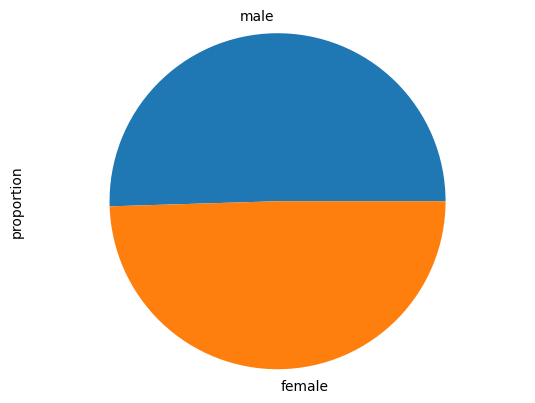

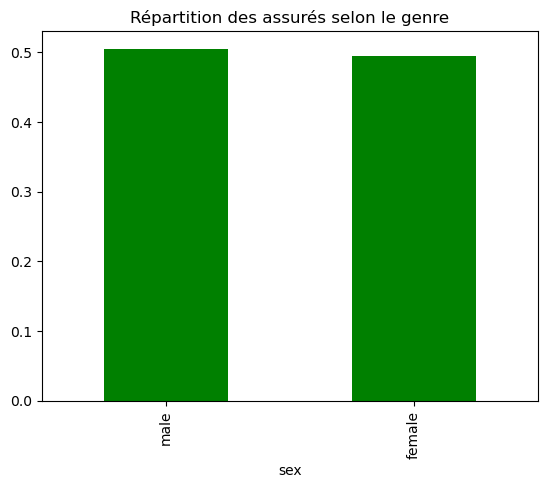

In [4]:
# Diagramme en secteurs
data["sex"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

# Diagramme en barres
data["sex"].value_counts(normalize=True).plot(kind='bar', color="green").set(title="Répartition des assurés selon le genre")
plt.show()

On constate peu d'informations ici, simplement que la répartition entre les hommes et les femmes est équilibrée et avoisine les 50% de chaque part.

### Variable "bmi"

In [26]:
data["bmi"].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

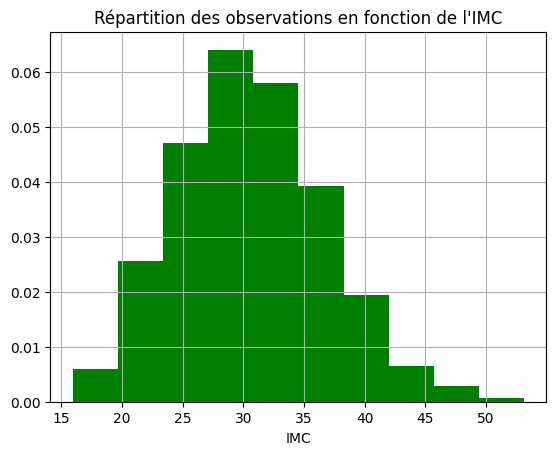

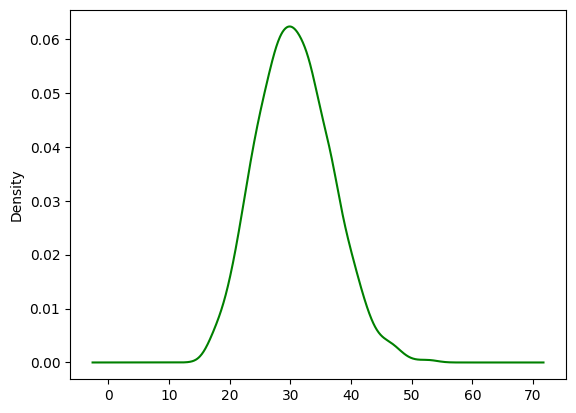

In [15]:
data["bmi"].hist(density=True, color="green")
plt.title("Répartition des observations en fonction de l'IMC")
plt.xlabel("IMC")
plt.show()

data["bmi"].plot.kde(color="green")
plt.show()

Pour visualiser la variable "bmi" différement dans un graphique, on peut agréger les valeurs en classes représentées par les différentes catégories de l'IMC.

In [11]:
bmi_scale = [
    {"category": "Underweight", "range": [float("-inf"), 18.499]},
    {"category": "Healthy weight", "range": [18.5, 24.999]},
    {"category": "Overweight", "range": [25, 29.999]},
    {"category": "Obesity class I", "range": [30, 34.999]},
    {"category": "Obesity class II", "range": [35, 39.999]},
    {"category": "Obesity class III", "range": [40, float("inf")]},
]

bmi_count = []
for bmi in data["bmi"]:
    for group in bmi_scale:
        if bmi >= group["range"][0] and bmi <= group["range"][1]:
            bmi_count.append(group["category"])
            continue

data["bmi_groups"] = bmi_count

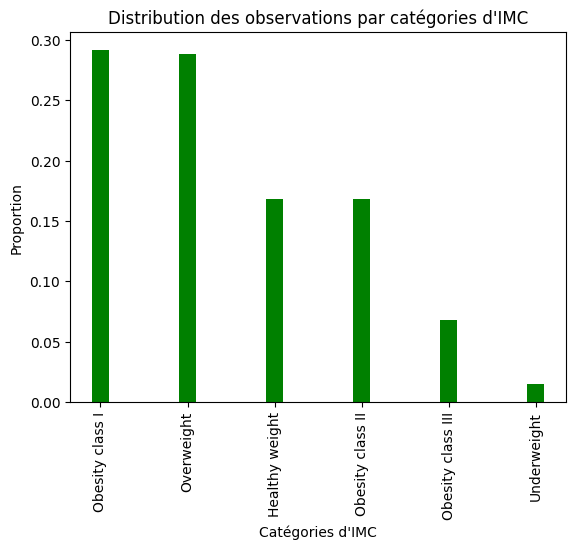

In [13]:
data["bmi_groups"].value_counts(normalize=True).plot(kind="bar", color="green", width=0.2)
plt.title("Distribution des observations par catégories d'IMC")
plt.xlabel("Catégories d'IMC")
plt.ylabel("Proportion")
plt.show()

On remarque une plus forte proportion d'observations dans les classes "Obésité Classe 1" et "Surpoids" que dans les autres.

In [20]:
groups = data["bmi_groups"].value_counts()
modalities = groups.index

tab = pd.DataFrame(modalities, columns=["bmi_groups"])
tab["n"] = groups.values
tab["f"] = tab["n"] / len(data)
tab["F"] = tab["f"].cumsum()

display(tab)

,bmi_groups,n,f,F
0,Obesity class I,390,0.291698,0.291698
1,Overweight,386,0.288706,0.580404
2,Healthy weight,225,0.168287,0.748691
3,Obesity class II,225,0.168287,0.916978
4,Obesity class III,91,0.068063,0.985041
5,Underweight,20,0.014959,1.000000


Lorsque l'on regarde les fréquences cumulées, les catégories "Obésité classe 1" et "Surpoids" représente 58% du jeu de données.

### Variable "children"

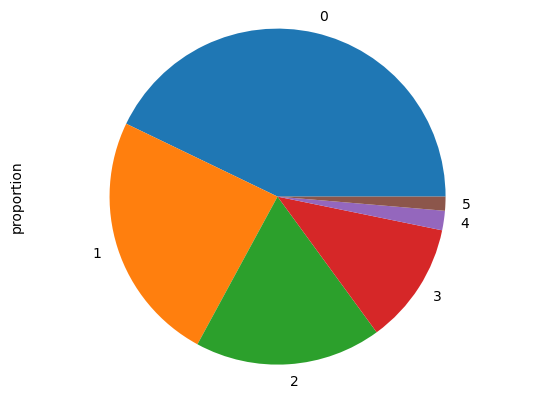

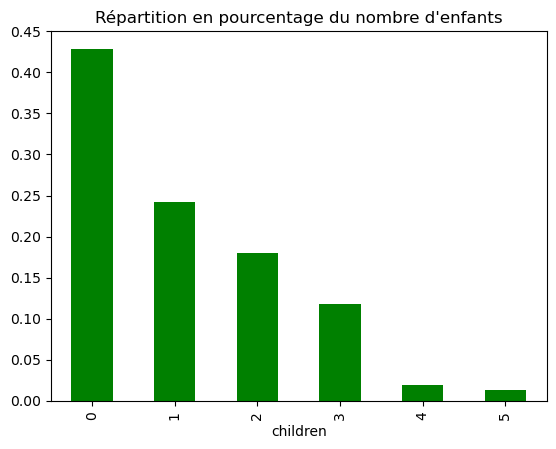

In [5]:
# Diagramme en secteurs
data["children"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

# Diagramme en barres
data["children"].value_counts(normalize=True).plot(kind='bar', color="green").set(title="Répartition en pourcentage du nombre d'enfants")
plt.show()

Sur ce rendu graphique, on constate que plus de 50% des individus ont des enfants (entre 40 et 45% n'ont pas d'enfants). La courbe du nombre d'enfants a tendance a diminuer et  très peu d'individus possèdent plus de 3 enfants, ce qui est une constatation plutôt logique.

### Variable "smoker"

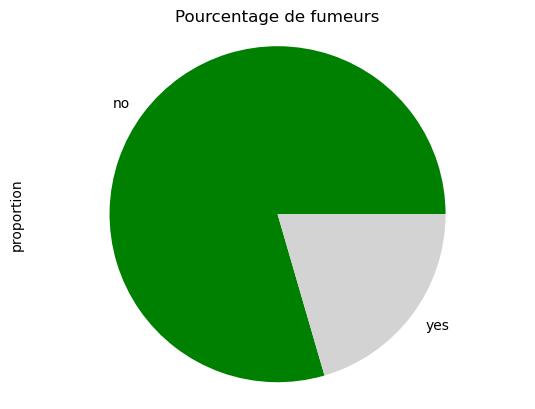

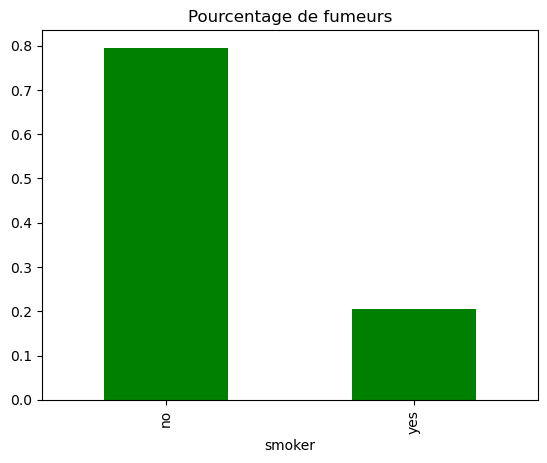

In [6]:
custom_col = ["green","lightgrey"]
# Diagramme en secteurs
data["smoker"].value_counts(normalize=True).plot(kind='pie', colors=custom_col).set(title="Pourcentage de fumeurs")
plt.axis('equal') 
plt.show()

# Diagramme en barres
data["smoker"].value_counts(normalize=True).plot(kind='bar', color="green").set(title="Pourcentage de fumeurs")
plt.show()

Ici, une variable importante qui aura une forte incidence par la suite, et on observe un pourcentage d'environ 20% de fumeurs parmi les individus.

### Variable "region"

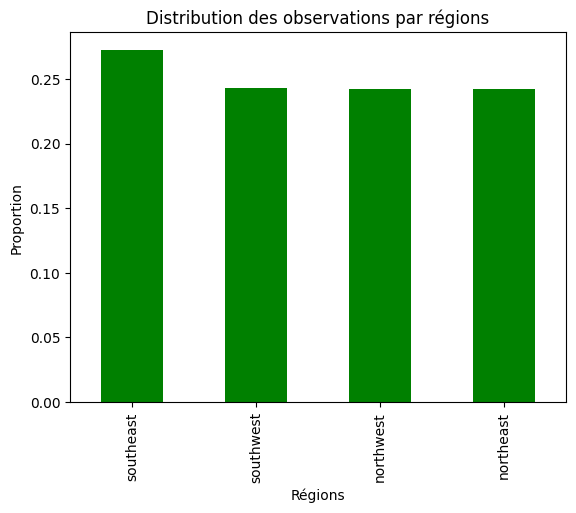

In [9]:
data["region"].value_counts(normalize=True).plot(kind="bar", color="green")
plt.title("Distribution des observations par régions")
plt.xlabel("Régions")
plt.ylabel("Proportion")
plt.show()

La proportion de chaque région est proche de 25% dans ce jeu de données.

### Variable "charges"

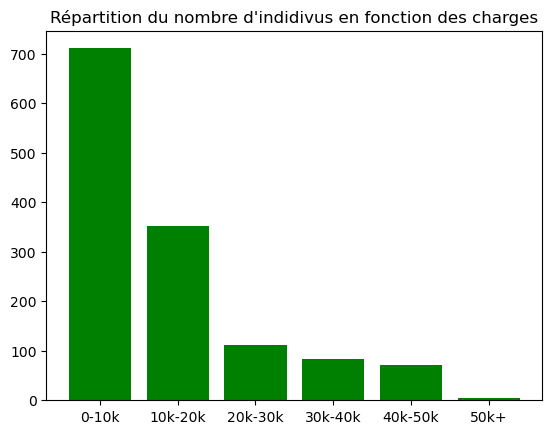

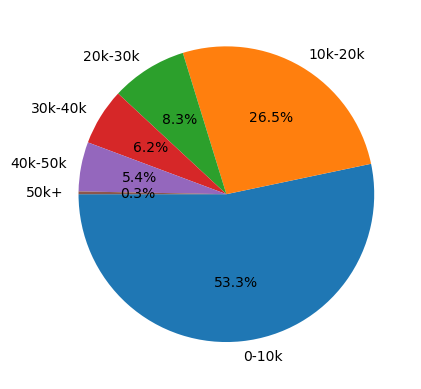

In [3]:
# Diagramme en barres
sections = [0, 10000, 20000, 30000, 40000, 50000, 60000]
data['sections'] = pd.cut(data['charges'], bins=sections, labels=['0-10k', '10k-20k', '20k-30k' , '30k-40k' , '40k-50k' , '50k+'])
grouped_data = data.groupby('sections').size().reset_index(name='count')
plt.bar(grouped_data['sections'], grouped_data['count'], color="green")
plt.title("Répartition du nombre d'indidivus en fonction des charges")
plt.show()

# Diagramme en camembert
plt.pie(grouped_data['count'], labels=grouped_data['sections'], autopct='%1.1f%%', startangle=180)
plt.show()

Après avoir regroupé les charges par tranches de 10 000, on remarque que la majorité absolue des individus reste dans la tranche basse, entre 0 et 10 000 $ de charges. Cette statistique reste cohérente.

## Etude de la corrélation des variables avec la variable cible "charges"

### Analyse corrélation des variables "age" et "charges"

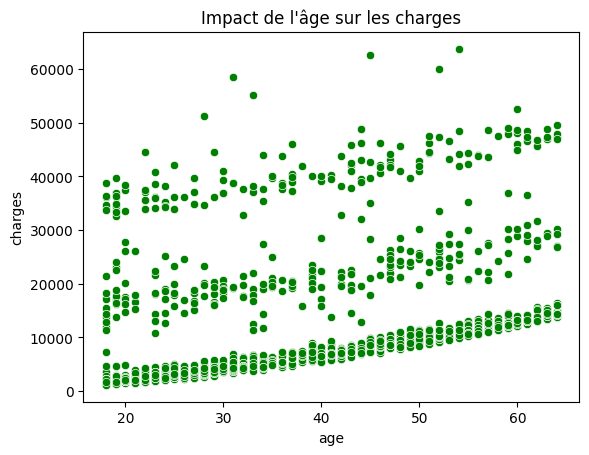

In [29]:
sns.scatterplot(x=data["age"], y=data["charges"], color="green")
plt.title("Impact de l'âge sur les charges")
plt.show()

Pour ce graphique on remarque que que les observations sont divisées en trois groupes d'intervales de charges. On peut également dire que plus l'age augmente, plus les charges augmentent également.

Il est probable qu'une autre variable explique le passage dans l'un des groupes d'intervales supérieures.

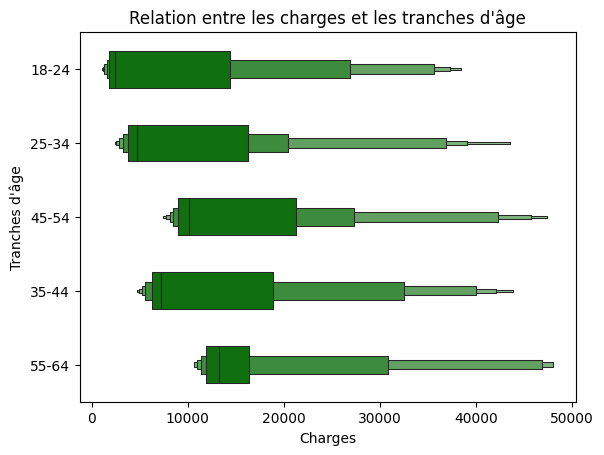

In [45]:
sns.boxenplot(x="charges", y="age_range", data=data, color="green", width=0.5, showfliers=False)
plt.title("Relation entre les charges et les tranches d'âge")
plt.ylabel("Tranches d'âge")
plt.xlabel("Charges")
plt.show()

Sur ce graphique on note bien que plus une observation fait partie d'une tranche d'âge élevé, plus elle aura des charges élevés.

In [47]:
print("Coefficient de Pearson : ", st.pearsonr(data["age"], data["charges"])[0])

Coefficient de Pearson :  0.2983082125097863


Le coefficient de Pearson nous donne une indication sur la corrélation entre l'age et les charges.

### Analyse corrélation des variables "sex" et "charges"

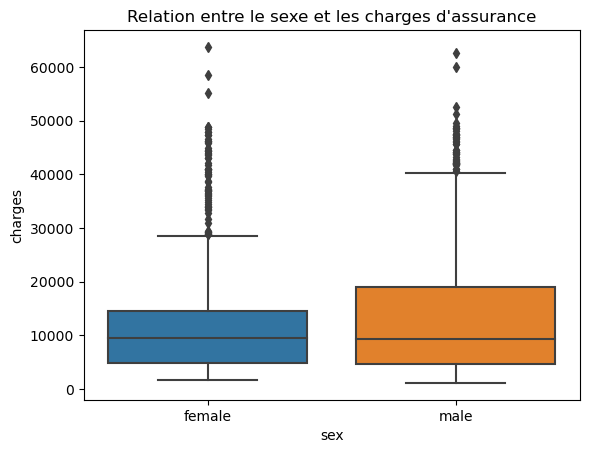

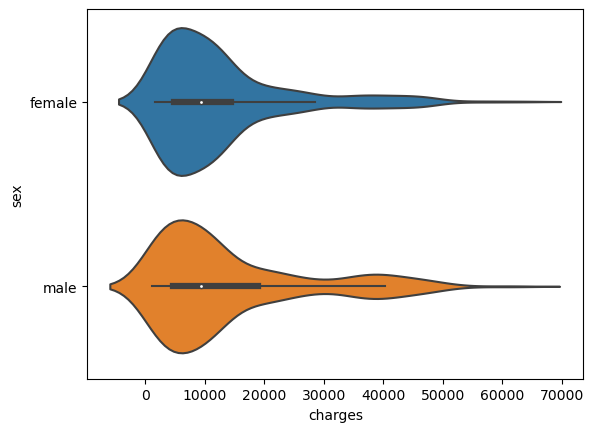

In [10]:
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Relation entre le sexe et les charges d\'assurance')
plt.show()

sns.violinplot(x=data['charges'], y=data['sex'], data=data)
plt.show()

On ne remarque pas de corrélation entre le genre et les charges.

### Analyse corrélation des variables "bmi" et "charges"

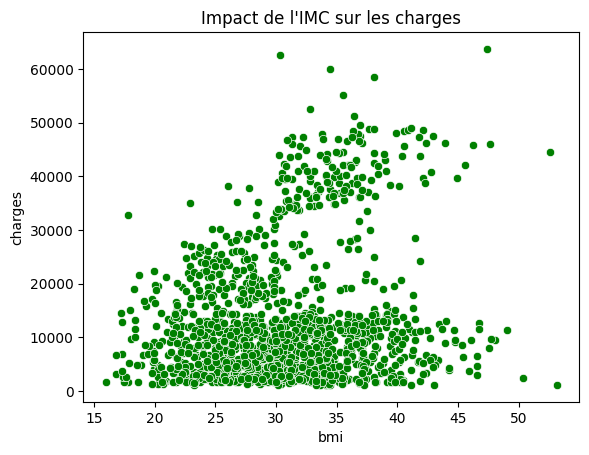

In [48]:
sns.scatterplot(x=data["bmi"], y=data["charges"], color="green")
plt.title("Impact de l'IMC sur les charges")
plt.show()

Sur ce graphique on remarque deux tendances. La première est que pour une première catégorie de personne (charges inférieures à 15 000), leur imc n'aura pas d'impact sur leurs charges. La seconde catégorie commence à partir des charges supérieures à 15 000 et est divisée en deux sous catégories. La première catégorie ayant des charges comprises entre 15 000 et 30 000 et un imc inférieur à 30. La seconde ayant des charges supérieures à 30 000 et un imc supérieur à 30.

Il est probable qu'une autre variable explique le passage dans l'un des groupes d'intervales supérieures.

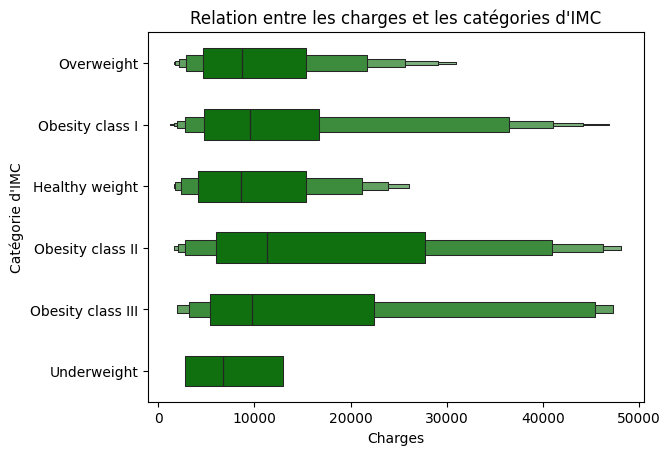

In [50]:
sns.boxenplot(x="charges", y="bmi_groups", data=data, color="green", width=0.5, showfliers=False)
plt.title("Relation entre les charges et les catégories d'IMC")
plt.ylabel("Catégorie d'IMC")
plt.xlabel("Charges")
plt.show()

In [49]:
print("Coefficient de Pearson : ", st.pearsonr(data["bmi"], data["charges"])[0])

Coefficient de Pearson :  0.1984008312262494


### Analyse corrélation des variables "children" et "charges"

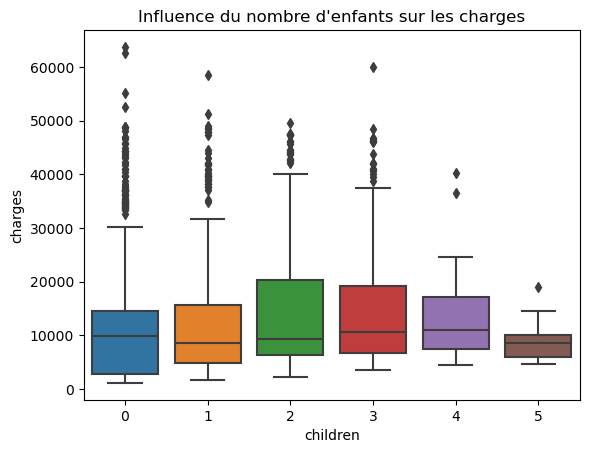

In [11]:
sns.boxplot(x=data['children'], y=data['charges'], data=data)
plt.title("Influence du nombre d'enfants sur les charges")
plt.show()

On remarque une légère influence du nombres d'enfants sur les charges.

### Analyse corrélation des variables "smoker" et "charges"

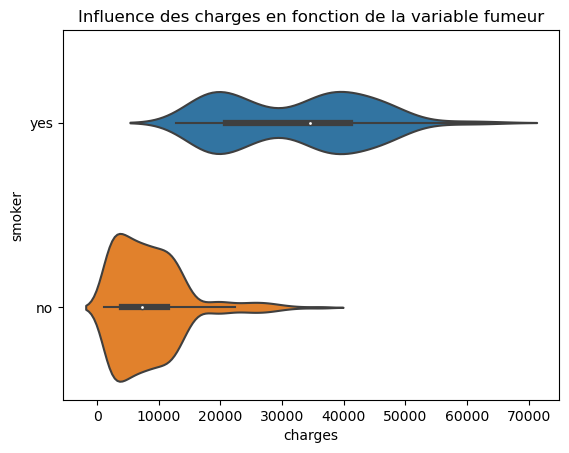

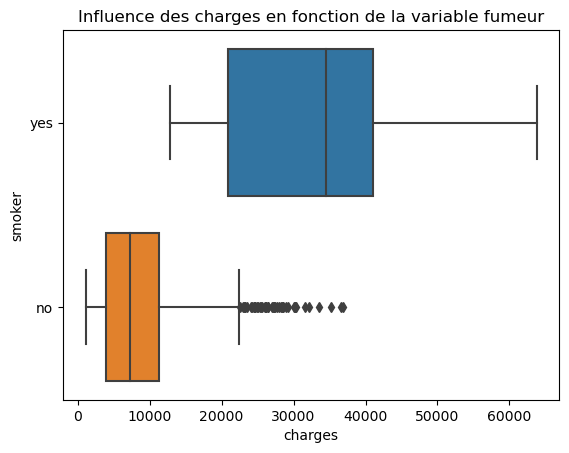

In [12]:
sns.violinplot(x=data['charges'], y=data['smoker'], data=data)
plt.title("Influence des charges en fonction de la variable fumeur")
plt.show()

sns.boxplot(x=data['charges'], y=data['smoker'], data=data)
plt.title("Influence des charges en fonction de la variable fumeur")
plt.show()

On aperçoit ici sur ces deux graphiques que la variable smoker a une forte incidence sur les charges, ce qui montre que les personnes fumeurs vont avoir une augmentation conséquente de leurs charges.

### Analyse corrélation des variables "region" et "charges"

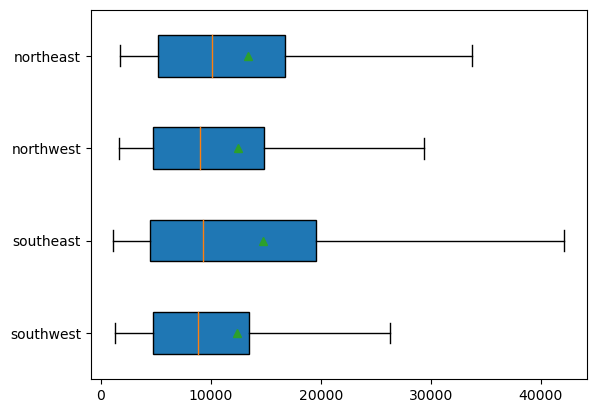

In [15]:
X = "region"
Y = "charges"

modalities = data[X].unique()
group = []
for m in modalities:
    group.append(data[data[X]==m][Y])

plt.boxplot(group, labels=modalities, showfliers=False, vert=False, patch_artist=True, showmeans=True)
plt.show()

On ne remarque pas de corrélation entre les régions et les charges.

## Analyses bivariées

### Analyse corrélation des variables "age" et "smoker"

#### Exploration graphique 

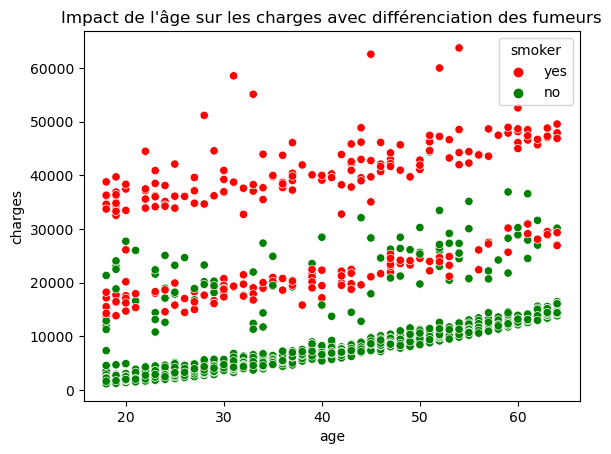

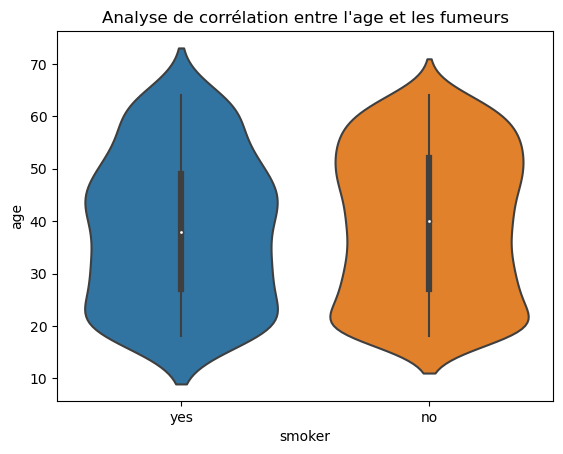

In [13]:
sns.scatterplot(x=data["age"], y=data["charges"], hue=data["smoker"], palette={"no": "green", "yes": "red"})
plt.title("Impact de l'âge sur les charges avec différenciation des fumeurs")
plt.show()

graph = sns.violinplot(x=data['smoker'], y=data['age'], data=data)
graph.set_title("Analyse de corrélation entre l'age et les fumeurs")
plt.show()

#### Test statistique

In [14]:
lm = smf.ols('age ~ smoker',data=data).fit()
print(lm.summary())

table = sm.stats.anova_lm(lm, typ=2)
print(table)

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8746
Date:                Tue, 16 Jan 2024   Prob (F-statistic):              0.350
Time:                        08:56:07   Log-Likelihood:                -5428.8
No. Observations:                1337   AIC:                         1.086e+04
Df Residuals:                    1335   BIC:                         1.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        39.4045      0.431     91.473

### Analyse corrélation des variables "bmi" et "smoker"

#### Exploration graphique 

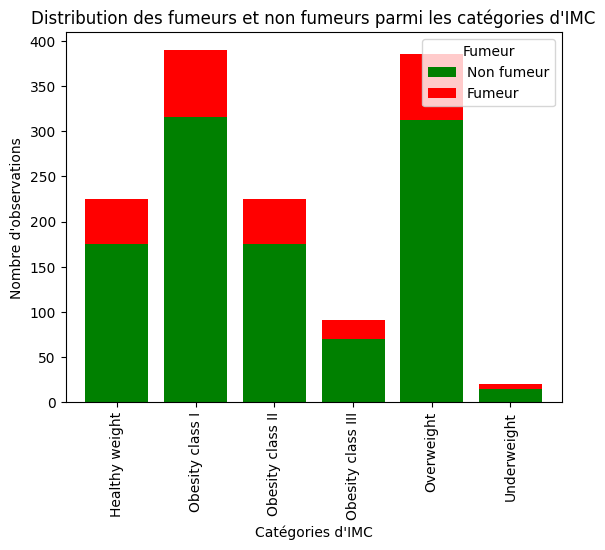

In [77]:
count_data = data.groupby(['bmi_groups', 'smoker']).size().unstack()

count_data.plot(kind='bar', stacked=True, color=['green', 'red'], width=0.8)

plt.title("Distribution des fumeurs et non fumeurs parmi les catégories d'IMC")
plt.xlabel("Catégories d'IMC")
plt.ylabel("Nombre d'observations")
plt.legend(title="Fumeur", labels=["Non fumeur", "Fumeur"], loc='upper right')
plt.show()

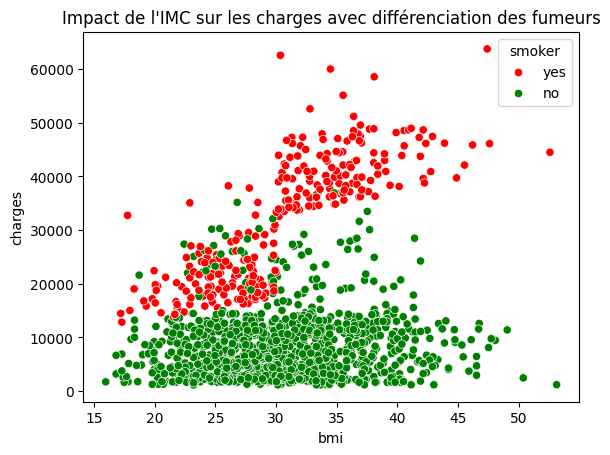

In [63]:
sns.scatterplot(x=data["bmi"], y=data["charges"], hue=data["smoker"], palette={"no": "green", "yes": "red"})
plt.title("Impact de l'IMC sur les charges avec différenciation des fumeurs")
plt.show()

#### Test statistique

In [78]:
cont = pd.crosstab(
    data["bmi_groups"],
    data["smoker"],
    margins=True,
    margins_name="total",
)

display(cont)

smoker,no,yes,total
bmi_groups,,,
Healthy weight,175,50,225
Obesity class I,316,74,390
Obesity class II,175,50,225
Obesity class III,70,21,91
Overweight,312,74,386
Underweight,15,5,20
total,1063,274,1337


In [79]:
chi2, p, tmp, tmp1 = st.chi2_contingency(cont)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 2.4141148308361418
P-value: 0.9984552024333331
